In [29]:
pip install openpyxl


[notice] A new release of pip is available: 23.0.1 -> 25.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [30]:
import pandas as pd
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [31]:
df = pd.read_excel('P_Data_Extract_From_World_Development_Indicators.xlsx', index_col=0)
df = df.drop(labels = ['Series Code', 'Country Code'] , axis = 1)
df= df.dropna()
df = df.reset_index()
df = df.drop('Country Name' , axis = 1)
df

,Series Name,1975 [YR1975],1976 [YR1976],1977 [YR1977],1978 [YR1978],1979 [YR1979],1980 [YR1980],1981 [YR1981],1982 [YR1982],1983 [YR1983],...,2014 [YR2014],2015 [YR2015],2016 [YR2016],2017 [YR2017],2018 [YR2018],2019 [YR2019],2020 [YR2020],2021 [YR2021],2022 [YR2022],2023 [YR2023]
0,GDP per capita (current US$),9.763299e+02,1.157412e+03,1.476248e+03,1.929399e+03,2.559229e+03,4.232023e+03,4.033240e+03,4.122785e+03,4.091049e+03,...,2.724435e+04,2.348723e+04,2.471515e+04,2.669699e+04,2.959999e+04,2.970305e+04,2.864902e+04,3.373404e+04,3.389445e+04,3.655142e+04
1,"Unemployment, total (% of total labor force) (...",1.090000e+01,7.400000e+00,3.100000e+00,2.000000e+00,1.700000e+00,2.000000e+00,2.600000e+00,2.800000e+00,3.300000e+00,...,1.627700e+01,1.502600e+01,1.300600e+01,1.115500e+01,8.504000e+00,7.155000e+00,7.755000e+00,7.513000e+00,6.807000e+00,5.835000e+00
2,Imports of goods and services (current US$),2.777442e+08,3.607681e+08,4.979649e+08,6.065836e+08,8.217558e+08,1.358664e+09,1.321843e+09,1.387106e+09,1.382086e+09,...,1.507192e+10,1.339081e+10,1.442483e+10,1.702105e+10,1.882938e+10,1.958130e+10,2.070511e+10,2.614170e+10,3.155758e+10,3.256899e+10
3,"Inflation, consumer prices (annual %)",4.639486e+00,3.854390e+00,7.326460e+00,7.436283e+00,9.463708e+00,1.351756e+01,1.074469e+01,6.432797e+00,5.049714e+00,...,-1.354989e+00,-2.096998e+00,-1.429167e+00,5.317665e-01,1.435491e+00,2.503710e-01,-6.384228e-01,2.446089e+00,8.395483e+00,3.541342e+00
4,"Foreign direct investment, net inflows (% of GDP)",3.694537e+00,5.624095e+00,5.634859e+00,5.915430e+00,5.473193e+00,3.944342e+00,3.751129e+00,3.312312e+00,3.164179e+00,...,2.331658e+02,1.372207e+02,1.582723e+01,1.840543e+02,3.070867e+02,4.317885e+02,-2.960132e+02,1.504825e+01,5.290501e+01,-1.051403e+01
5,Tax revenue (% of GDP),1.338910e+01,1.212040e+01,1.323091e+01,1.357947e+01,1.419975e+01,1.478758e+01,1.379338e+01,1.424139e+01,1.540600e+01,...,2.471572e+01,2.404739e+01,2.351606e+01,2.381988e+01,2.383345e+01,2.307480e+01,2.194011e+01,2.255228e+01,2.316304e+01,2.408231e+01


In [32]:

# Melt to long format
df_melted = df.melt(id_vars='Series Name', var_name='year', value_name='value')
df_melted['year'] = df_melted['year'].str.extract(r'(\d{4})')

df_melted

,Series Name,year,value
0,GDP per capita (current US$),1975,9.763299e+02
1,"Unemployment, total (% of total labor force) (...",1975,1.090000e+01
2,Imports of goods and services (current US$),1975,2.777442e+08
3,"Inflation, consumer prices (annual %)",1975,4.639486e+00
4,"Foreign direct investment, net inflows (% of GDP)",1975,3.694537e+00
...,...,...,...
289,"Unemployment, total (% of total labor force) (...",2023,5.835000e+00
290,Imports of goods and services (current US$),2023,3.256899e+10
291,"Inflation, consumer prices (annual %)",2023,3.541342e+00
292,"Foreign direct investment, net inflows (% of GDP)",2023,-1.051403e+01


In [33]:
# Pivot 'series name' into columns
df_pivoted = df_melted.pivot(index='year', columns='Series Name', values='value').reset_index()

df_pivoted

Series Name,year,"Foreign direct investment, net inflows (% of GDP)",GDP per capita (current US$),Imports of goods and services (current US$),"Inflation, consumer prices (annual %)",Tax revenue (% of GDP),"Unemployment, total (% of total labor force) (national estimate)"
0,1975,3.694537,976.329895,2.777442e+08,4.639486,13.389104,10.900
1,1976,5.624095,1157.411621,3.607681e+08,3.854390,12.120396,7.400
2,1977,5.634859,1476.247559,4.979649e+08,7.326460,13.230914,3.100
3,1978,5.915430,1929.399292,6.065836e+08,7.436283,13.579467,2.000
4,1979,5.473193,2559.229004,8.217558e+08,9.463708,14.199746,1.700
5,1980,3.944342,4232.022949,1.358664e+09,13.517561,14.787584,2.000
6,1981,3.751129,4033.240479,1.321843e+09,10.744694,13.793379,2.600
7,1982,3.312312,4122.784668,1.387106e+09,6.432797,14.241390,2.800
8,1983,3.164179,4091.048584,1.382086e+09,5.049714,15.405999,3.300
9,1984,2.312588,4258.743652,1.528713e+09,5.991951,16.132046,3.300


In [34]:
df = df_pivoted

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Show basic info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49 entries, 0 to 48
Data columns (total 7 columns):
 #   Column                                                            Non-Null Count  Dtype  
---  ------                                                            --------------  -----  
 0   year                                                              49 non-null     object 
 1   Foreign direct investment, net inflows (% of GDP)                 49 non-null     float64
 2   GDP per capita (current US$)                                      49 non-null     float64
 3   Imports of goods and services (current US$)                       49 non-null     float64
 4   Inflation, consumer prices (annual %)                             49 non-null     float64
 5   Tax revenue (% of GDP)                                            49 non-null     float64
 6   Unemployment, total (% of total labor force) (national estimate)  49 non-null     float64
dtypes: float64(6), object(1)
memory usage:

In [37]:
df.describe()

Series Name,"Foreign direct investment, net inflows (% of GDP)",GDP per capita (current US$),Imports of goods and services (current US$),"Inflation, consumer prices (annual %)",Tax revenue (% of GDP),"Unemployment, total (% of total labor force) (national estimate)"
count,49.000000,49.000000,4.900000e+01,49.000000,49.000000,49.000000
mean,44.656842,17218.788847,9.085468e+09,3.586091,19.824111,5.527000
std,110.136310,11367.897845,8.182606e+09,3.060564,4.037611,3.820594
min,-296.013199,976.329895,2.777442e+08,-2.096998,12.120396,1.700000
25%,2.334713,6690.578125,1.862396e+09,2.227707,16.701231,3.000000
50%,5.724023,15139.220703,6.748356e+09,3.289449,20.796634,3.946000
75%,15.827227,27797.457031,1.429354e+10,4.854167,23.168458,7.155000
max,431.788470,36551.417969,3.256899e+10,13.517561,28.422952,16.277000


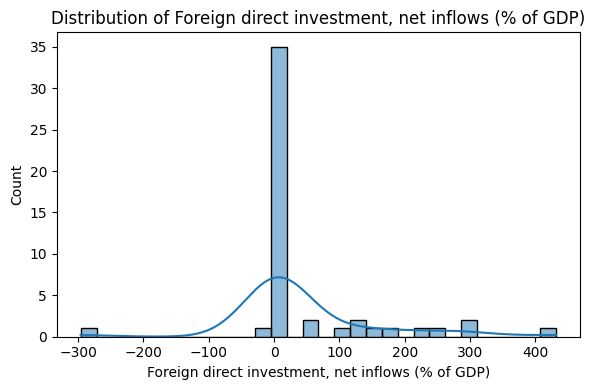

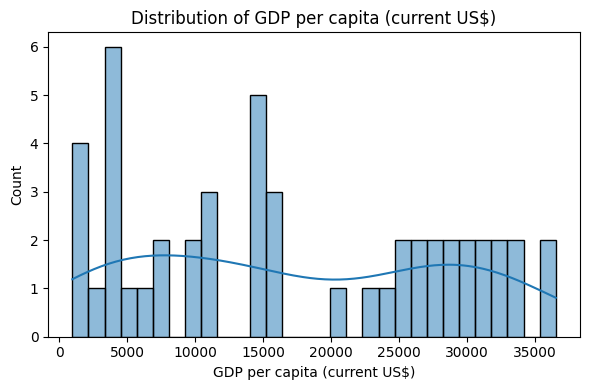

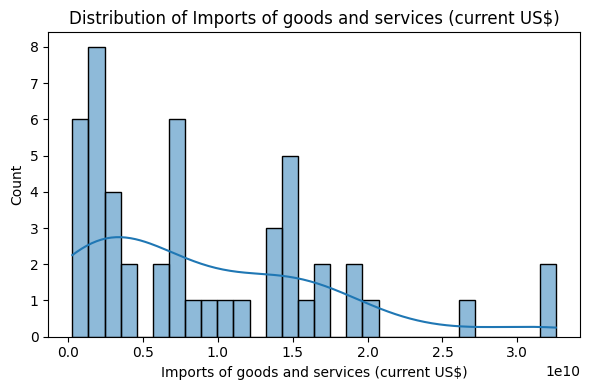

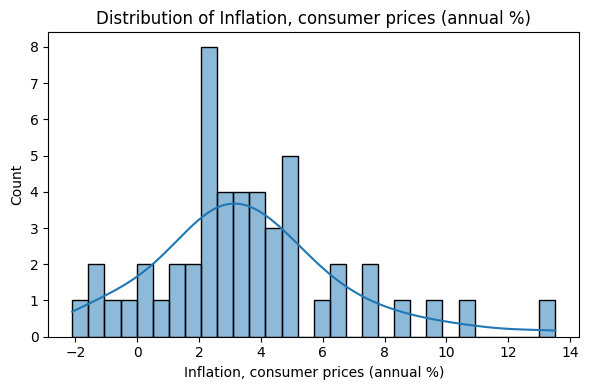

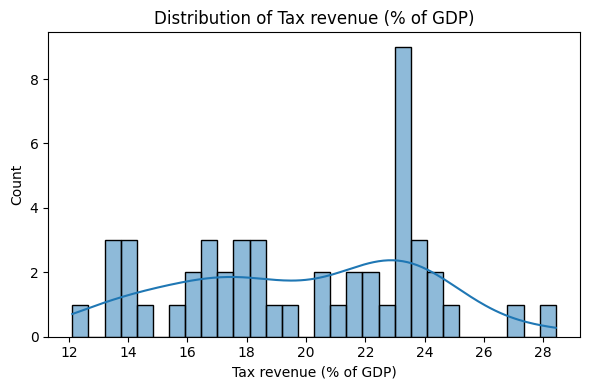

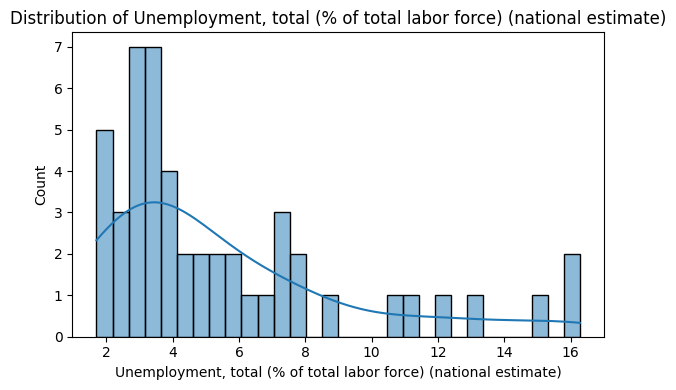

In [38]:
# Plot histograms for all numeric columns
numeric_cols = df.select_dtypes(include='number').columns
for col in numeric_cols:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f"Distribution of {col}")
    plt.tight_layout()
    plt.show()

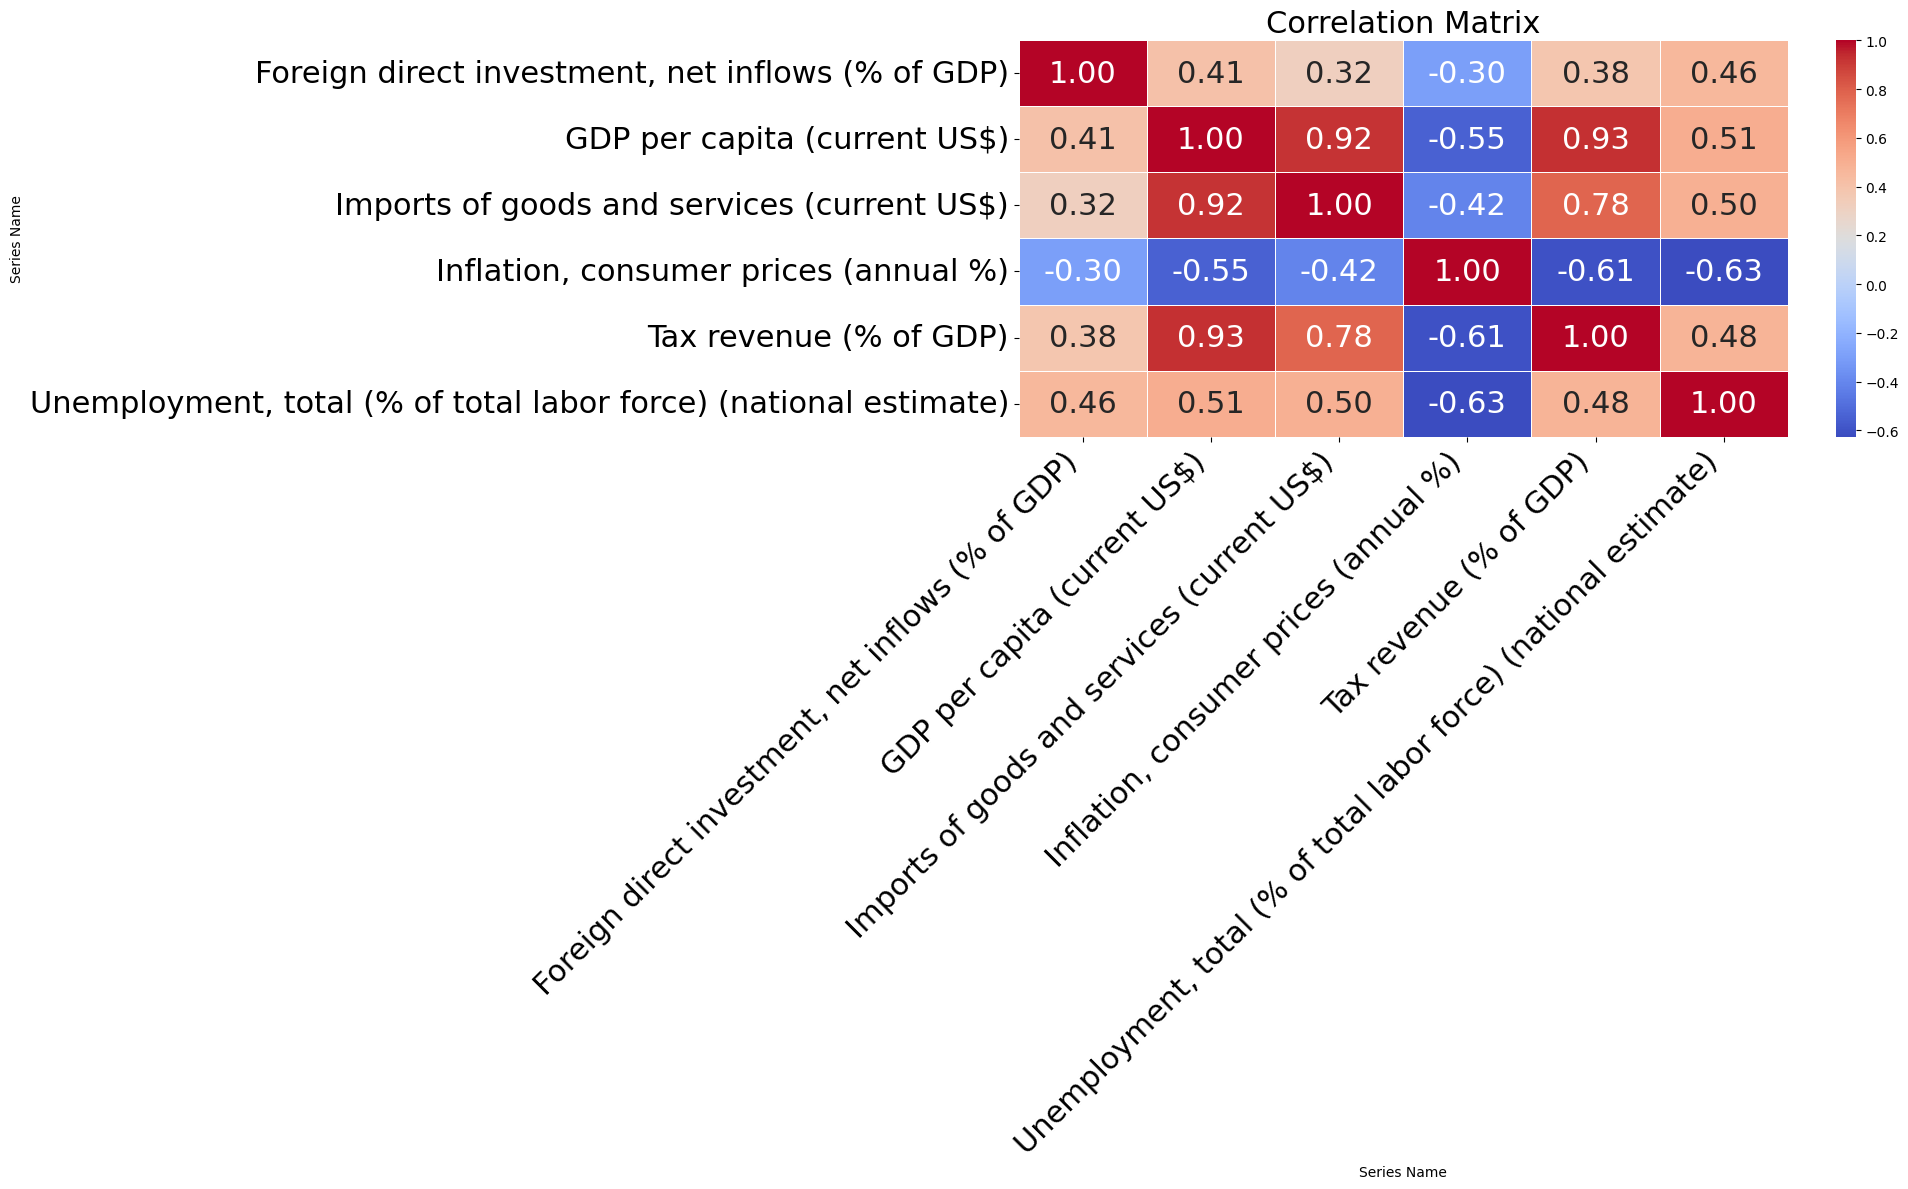

In [43]:
# Correlation heatmap
plt.figure(figsize=(20, 12))

# Create heatmap with increased font sizes
sns.heatmap(
    df.corr(numeric_only=True),
    annot=True,
    cmap='coolwarm',
    annot_kws={"size": 22},  # Size of numbers inside boxes
    fmt=".2f",               # Format of the numbers
    linewidths=0.5           # adds lines between cells
)

plt.xticks(rotation=45, ha='right', fontsize=22)
plt.yticks(rotation=0, fontsize=22)
plt.title("Correlation Matrix", fontsize=22)
plt.tight_layout()
plt.show()

R2 Score: 0.1707
RMSE: 2.3517


/opt/venv/lib/python3.10/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


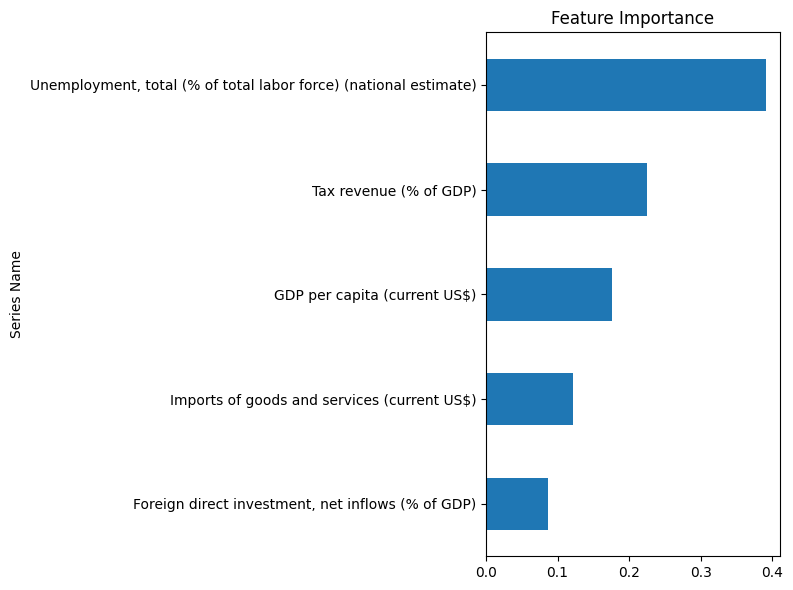

In [44]:
# Define features and target
X = df.drop(columns=[
    'Inflation, consumer prices (annual %)',
    'year'
])

y = df['Inflation, consumer prices (annual %)']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest model
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
print("R2 Score:", round(r2_score(y_test, y_pred), 4))
print("RMSE:", round(mean_squared_error(y_test, y_pred, squared=False), 4))

# Feature importance
importances = pd.Series(model.feature_importances_, index=X.columns)
importances.sort_values().plot(kind='barh', title="Feature Importance", figsize=(8, 6))
plt.tight_layout()
plt.show()

In [45]:
# Predict on a hypothetical scenario
sample = pd.DataFrame({
    'Foreign direct investment, net inflows (% of GDP)': [25],
    'GDP per capita (current US$)': [40000],
    'Imports of goods and services (current US$)': [2.5e10],
    'Tax revenue (% of GDP)': [22],
    'Unemployment, total (% of total labor force) (national estimate)': [5]
})

predicted_inflation = model.predict(sample)[0]
print("Predicted Inflation (hypothetical scenario):", round(predicted_inflation, 2), "%")

Predicted Inflation (hypothetical scenario): 3.19 %
